In [6]:
import numpy as np
#Import libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import os
import warnings
import nfl_data_py as nfl
import matplotlib.patches as patches
from adjustText import adjust_text
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Generate random points
np.random.seed(0)  # For reproducibility
points = np.random.rand(10, 2)  # 10 random points in 2D

In [15]:
#Import Data
games = pd.read_csv("../Data/games.csv")
players = pd.read_csv("../Data/players.csv")
plays = pd.read_csv("../Data/plays.csv")
tackles = pd.read_csv("../Data/tackles.csv")

tracking = pd.read_csv("../Data/tracking_week_3.csv")

In [40]:
plays[(plays["gameId"]==2022092513)& (plays["playId"]==3793)]

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
3014,2022092513,3793,53464,Javonte Williams,(2:06) J.Williams up the middle to DEN 43 for ...,4,1,10,DEN,SF,DEN,42,2:06,11,10,NaN,NaN,NaN,1,1,N,68,SINGLEBACK,8.0,0.109284,0.803921,0.196079,-0.010974,0.010974,2.086148,-0.476803,NaN,NaN,NaN,NaN


In [50]:
tackles[(tackles["gameId"]==2022092513)& (tackles["playId"]==3793)]

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
2756,2022092513,3793,46757,1,0,0,0
11665,2022092513,3793,43405,0,1,0,0


In [79]:
#Extract a play and frame
tracking_sample_play = tracking[(tracking["gameId"]==2022092513) & (tracking["playId"]==3793)& (tracking["frameId"]==45)]
display(tracking_sample_play)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
1321509,2022092513,3793,38605.0,Russell Wilson,45,2022-09-25 23:19:33.700000,3.0,DEN,left,72.260000,30.17,2.24,0.63,0.23,282.61,309.03,tackle
1321558,2022092513,3793,38868.0,Tashaun Gipson,45,2022-09-25 23:19:33.700000,31.0,SF,left,72.290000,27.86,1.93,2.29,0.20,307.99,336.96,tackle
1321607,2022092513,3793,41369.0,Cameron Fleming,45,2022-09-25 23:19:33.700000,73.0,DEN,left,67.770000,29.04,1.04,0.30,0.11,342.77,345.15,tackle
1321656,2022092513,3793,42721.0,Eric Tomlinson,45,2022-09-25 23:19:33.700000,87.0,DEN,left,65.270000,30.48,1.75,1.68,0.17,20.51,9.39,tackle
1321705,2022092513,3793,43384.0,Graham Glasgow,45,2022-09-25 23:19:33.700000,61.0,DEN,left,64.510000,25.81,1.40,1.56,0.14,310.44,281.45,tackle
1321754,2022092513,3793,43405.0,Hassan Ridgeway,45,2022-09-25 23:19:33.700000,98.0,SF,left,67.910000,30.19,1.49,1.69,0.15,67.01,31.08,tackle
1321803,2022092513,3793,44832.0,Garett Bolles,45,2022-09-25 23:19:33.700000,72.0,DEN,left,68.600000,28.82,2.89,2.17,0.28,317.31,343.59,tackle
1321852,2022092513,3793,44938.0,Samson Ebukam,45,2022-09-25 23:19:33.700000,56.0,SF,left,68.070000,29.84,1.39,2.62,0.13,313.89,306.78,tackle
1321901,2022092513,3793,44987.0,Eric Saubert,45,2022-09-25 23:19:33.700000,82.0,DEN,left,70.140000,25.54,0.66,2.10,0.07,347.37,260.65,tackle
1321950,2022092513,3793,46109.0,Courtland Sutton,45,2022-09-25 23:19:33.700000,14.0,DEN,left,61.430000,18.03,5.25,1.18,0.53,349.77,341.65,tackle


In [80]:
points = tracking_sample_play[["x","y","club","nflId"]].values

In [88]:
points

array([[72.26, 30.17, 'DEN', 38605.0],
       [72.29, 27.86, 'SF', 38868.0],
       [67.77, 29.04, 'DEN', 41369.0],
       [65.27, 30.48, 'DEN', 42721.0],
       [64.51, 25.81, 'DEN', 43384.0],
       [67.91, 30.19, 'SF', 43405.0],
       [68.6, 28.82, 'DEN', 44832.0],
       [68.07, 29.84, 'SF', 44938.0],
       [70.14, 25.54, 'DEN', 44987.0],
       [61.43, 18.03, 'DEN', 46109.0],
       [66.57, 29.31, 'SF', 46139.0],
       [60.81, 18.29, 'SF', 46354.0],
       [68.34, 30.28, 'SF', 46757.0],
       [71.99, 25.33, 'SF', 47785.0],
       [66.38, 24.79, 'DEN', 47824.0],
       [67.28, 30.74, 'SF', 47931.0],
       [69.74, 23.56, 'DEN', 48096.0],
       [63.96, 24.88, 'SF', 48117.0],
       [67.78, 30.96, 'SF', 48123.0],
       [65.28, 25.61, 'DEN', 52491.0],
       [68.79, 30.82, 'DEN', 53464.0],
       [64.13, 29.47, 'SF', 53609.0],
       [68.7799987792969, 30.9099998474121, 'football', nan]],
      dtype=object)

In [90]:
from scipy.spatial import Voronoi

vor = Voronoi(points[points[:,2]=="SF"][:,:2])


In [91]:
points[points[:, 2] == 'DEN'][:, 0]

array([72.26, 67.77, 65.27, 64.51, 68.6, 70.14, 61.43, 66.38, 69.74,
       65.28, 68.79], dtype=object)

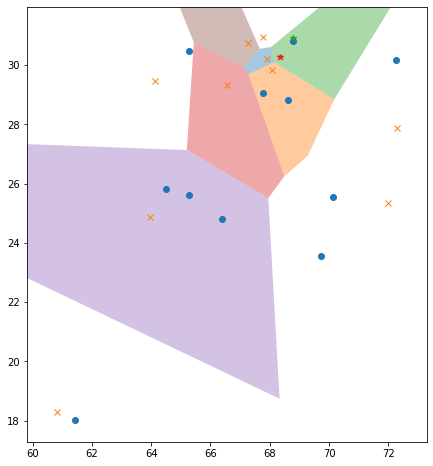

In [92]:
import matplotlib.pyplot as plt

# Plot Voronoi diagram
plt.figure(figsize=(8, 8))
plt.plot(points[points[:, 2] == 'DEN'][:, 0], points[points[:, 2] == 'DEN'][:, 1], 'o')  # Plot the original points
plt.plot(points[points[:, 2] == 'SF'][:, 0], points[points[:, 2] == 'SF'][:, 1], 'x')
plt.plot(points[points[:, 2] == 'football'][:, 0], points[points[:, 2] == 'football'][:, 1], '*')
plt.plot(points[points[:, 3] == 46757][:, 0], points[points[:, 3] == 46757][:, 1], '*')


# Plot Voronoi regions
for region in vor.regions:
    if not -1 in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), alpha=0.4)

plt.xlim(vor.min_bound[0] - 1, vor.max_bound[0] + 1)
plt.ylim(vor.min_bound[1] - 1, vor.max_bound[1] + 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [87]:
vor.vertices

array([[70.61500106, 28.99344157],
       [66.38345074, 19.59515811],
       [49.56868468, 27.71115983],
       [62.52768839, 21.51679538],
       [65.01246505, 20.59906035],
       [70.36433564, 32.51768817],
       [70.29015436, 29.87413708],
       [70.25080077, 27.5935467 ],
       [68.31728292, 24.87782163],
       [67.98754267, 26.53091942],
       [65.14963138, 24.28731039],
       [71.20920428, 26.70537103],
       [70.94157246, 24.34766213],
       [60.94659483, 27.28975575],
       [64.72493584, 25.055253  ],
       [65.2415198 , 27.73567692],
       [65.39733022, 27.64397136],
       [66.72163242, 27.18225518],
       [67.60496113, 26.74167154],
       [67.10189688, 26.90620314],
       [65.34092338, 29.25158153],
       [65.70844651, 34.9898943 ],
       [66.31125423, 30.32972692],
       [67.1244293 , 29.92598265],
       [68.04670945, 30.60905484],
       [67.66441489, 30.54451161],
       [67.28334294, 29.6787464 ],
       [67.27932437, 29.69011971],
       [68.15523651,

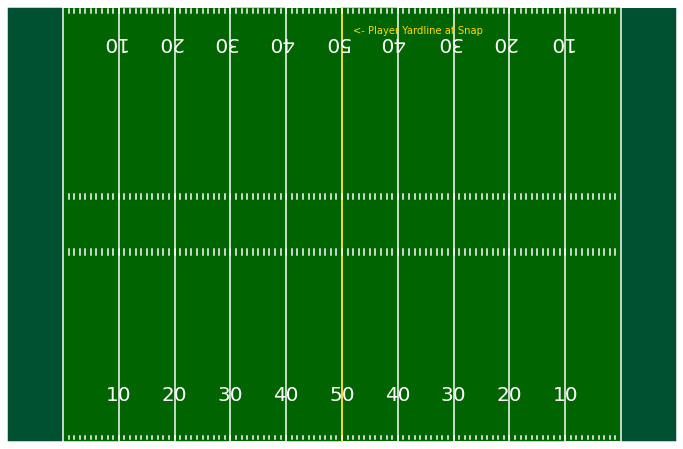

In [10]:
rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                         edgecolor='r', facecolor='darkgreen', zorder=0)

fig, ax = plt.subplots(1, figsize=(12,8))
ax.add_patch(rect)

plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
          80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
         [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
          53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
         color='white')
if True:
    plt.plot([60, 60], [0, 53.3], color='gold')
    plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
# Endzones
if True:
    ez1 = patches.Rectangle((0, 0), 10, 53.3,
                            linewidth=0.1,
                            edgecolor='r',
                            facecolor='blue',
                            alpha=0.2,
                            zorder=0)
    ez2 = patches.Rectangle((110, 0), 120, 53.3,
                            linewidth=0.1,
                            edgecolor='r',
                            facecolor='blue',
                            alpha=0.2,
                            zorder=0)
    ax.add_patch(ez1)
    ax.add_patch(ez2)
plt.xlim(0,120)
plt.ylim(0,53.3)
plt.axis('off')
if True:
    for x in range(20, 110, 10):
        numb = x
        if x > 50:
            numb = 120 - x
        plt.text(x, 5, str(numb - 10),
                 horizontalalignment='center',
                 fontsize=20,  # fontname='Arial',
                 color='white')
        plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                 horizontalalignment='center',
                 fontsize=20,  # fontname='Arial',
                 color='white', rotation=180)
if True:
    hash_range = range(11, 110)
else:
    hash_range = range(1, 120)

for x in hash_range:
    ax.plot([x, x], [0.4, 0.7], color='white')
    ax.plot([x, x], [53.0, 52.5], color='white')
    ax.plot([x, x], [22.91, 23.57], color='white')
    ax.plot([x, x], [29.73, 30.39], color='white')